# $A{\bf x} = {\bf b}$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# possible questions: 35, 60, 61
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
reload(ut)
print ''

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

## Multiplying a Matrix by a Vector

Last lecture we studied the vector equation:
$$ x_1{\bf a_1} + x_2{\bf a_2} + ... + x_n{\bf a_n} = {\bf b}.$$

We also talked about how one can form a matrix from a set of vectors:
$$ A = [{\bf a_1} \; {\bf a_2} \; ... \;{\bf a_n}].$$

In particular, if we have $n$ vectors ${\bf a_1},{\bf a_2}, ..., {\bf a_n} \in \mathbb{R}^m,$ then A will be an $m \times n$ matrix:

$$ m\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{cccc}\begin{array}{c}\vdots\\\vdots\\{\bf a_1}\\\vdots\\\vdots\end{array}&\begin{array}{c}\vdots\\\vdots\\{\bf a_2}\\\vdots\\\vdots\end{array}&\dots&\begin{array}{c}\vdots\\\vdots\\{\bf a_n}\\\vdots\\\vdots\end{array}\\\end{array}\right]}^{\large n} $$

We're going to express a vector equation in a new way.  We are going to say that 

$$x_1{\bf a_1} + x_2{\bf a_2} + ... + x_n{\bf a_n}$$

is the same as:

$$A{\bf x}$$

where $A = \left[\begin{array}{cccc}\begin{array}{c}\vdots\\\vdots\\{\bf a_1}\\\vdots\\\vdots\end{array}&\begin{array}{c}\vdots\\\vdots\\{\bf a_2}\\\vdots\\\vdots\end{array}&\dots&\begin{array}{c}\vdots\\\vdots\\{\bf a_n}\\\vdots\\\vdots\end{array}\\\end{array}\right]$ and ${\bf x} = \left[\begin{array}{c}x_1\\x_2\\\vdots\\x_n\end{array}\right].$

What we have done is to define __Matrix-vector multiplication__.  That is, $A{\bf x}$ denotes multiplying a matrix and a vector, and we define it to be the same as a linear combination of the $\{\bf a_1, a_2, \dots, a_n\}$ with weights $x_1, x_2, \dots, x_n.$

Here is the definition: 

If $A$ is an $m\times n$ matrix, with columns $\bf a_1, a_2, \dots, a_n,$ and if ${\bf x} \in \mathbb{R}^n,$ then the __product of $A$ and $\bf x$,__ denoted $A{\bf x}$, is __the linear combination of the columns of $A$ using the corresponding entries in $x$ as weights;__ that is,

$$ A{\bf x} = [{\bf a_1} \; {\bf a_2} \; ... \;{\bf a_n}]\;\left[\begin{array}{c}x_1\\x_2\\\vdots\\x_n\end{array}\right] = x_1{\bf a_1} + x_2{\bf a_2} + ... + x_n{\bf a_n}.$$

Notice that if $A$ is an $m\times n$ matrix, then ${\bf x}$ must be in $\mathbb{R}^n$ in order for this operation to be defined.  That is, the number of __columns__ of $A$ must match the number of __rows__ of ${\bf x}.$

If the number of columns of $A$ does not match the number of rows of ${\bf x}$, then $A{\bf x}$ has no meaning.

## Example.

$$\left[\begin{array}{rrr}1&2&-1\\0&-5&3\end{array}\right]\;\left[\begin{array}{r}4\\3\\7\end{array}\right] =$$

$$ 4\left[\begin{array}{r}1\\0\end{array}\right] + 3\left[\begin{array}{r}2\\-5\end{array}\right] + 7\left[\begin{array}{r}-1\\3\end{array}\right] 
= $$

$$\left[\begin{array}{r}4\\0\end{array}\right] + \left[\begin{array}{r}6\\-15\end{array}\right]+ \left[\begin{array}{r}-7\\21\end{array}\right] = $$

$$\left[\begin{array}{r}3\\6\end{array}\right] $$

## Example.

For ${\bf v_1}, {\bf v_2}, {\bf v_3} \in \mathbb{R}^m,$ write the linear combination $3{\bf v_1} + 5{\bf v_2} + 7{\bf v_3}$ as a matrix times a vector.

$$3{\bf v_1} + 5{\bf v_2} + 7{\bf v_3} = [{\bf v_1} \; {\bf v_2} \; {\bf v_3}]\;\left[\begin{array}{c}3\\5\\7\end{array}\right] = A{\bf x}.$$

Notice that if $A = [{\bf a_1} \; {\bf a_2} \; ... \;{\bf a_n}]$ then $A{\bf x}$ is some point that lies in Span$\{{\bf a_1},{\bf a_2}, \dots ,{\bf a_n}\}$.

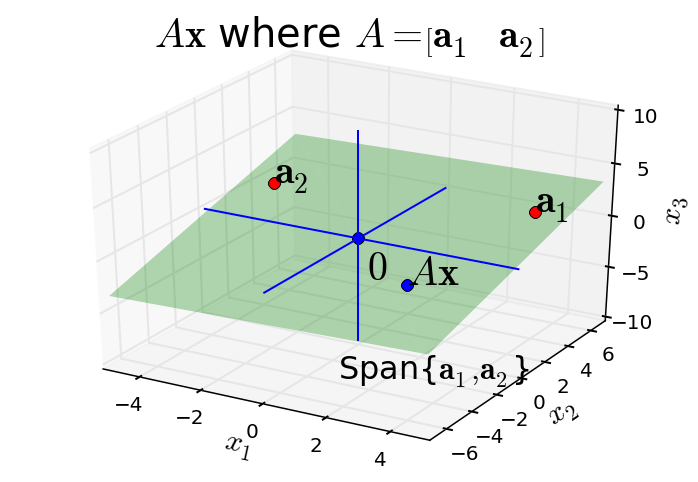

In [3]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup3d(-5,5,-7,7,-10,10)
v = [4.0,4.0,2.0]
u = [-4.0,3.0,1.0]
A = np.array([v, u]).T
x = np.array([[-0.1, -0.75]]).T
Ax = A.dot(x)
ax.text(v[0],v[1],v[2],r'$\bf a_1$',size=20)
ax.text(u[0],u[1],u[2],r'$\bf a_2$',size=20)
ax.text(Ax[0],Ax[1],Ax[2],r'$A\bf x$',size=20)
ax.text(1,-4,-10,r'Span{$\bf a_1,a_2$}',size=16)
ax.text(0.2,0.2,-4,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,u,v,'Green')
ut.plotPoint3d(ax,u[0],u[1],u[2],'r')
ut.plotPoint3d(ax,v[0],v[1],v[2],'r')
ut.plotPoint3d(ax,0,0,0,'b')
ut.plotPoint3d(ax,Ax[0],Ax[1],Ax[2],'b')
# plotting the axes
ut.plotIntersection3d(ax,[0,0,1,0],[0,1,0,0])
ut.plotIntersection3d(ax,[0,0,1,0],[1,0,0,0])
ut.plotIntersection3d(ax,[0,1,0,0],[1,0,0,0])
ax.set_title(r'$A{\bf x}$ where $A = \left[\bf a_1\;a_2\right]$',size=20)
print ''

## Question Time! Q4.1

## The Matrix Equation

Now let's write an equation.   Let's start with a linear system:

$$\begin{array}{rcl}x_1+2x_2-x_3&=&4\\-5x_2+3x_3&=&1\end{array}$$

We saw last lecture that this linear system is equivalent to a vector equation, namely

$$x_1\left[\begin{array}{r}1\\0\end{array}\right] + x_2\left[\begin{array}{r}2\\-5\end{array}\right] + x_3\left[\begin{array}{r}-1\\3\end{array}\right] = \left[\begin{array}{r}4\\1\end{array}\right]$$

Now, today we have learned that this vector equation is also equivalent to this __matrix equation__:

$$\left[\begin{array}{rrr}1&2&-1\\0&-5&3\end{array}\right]\;\left[\begin{array}{r}x_1\\x_2\\x_3\end{array}\right] = \left[\begin{array}{r}4\\1\end{array}\right].$$

which has the form $A{\bf x} = {\bf b}$.  

Notice how simple it is to go from the linear system to the matrix equation: we put the coefficients of the linear system into $A$, and the right hand side values into ${\bf b},$ and we can then write the matrix equation $A{\bf x} = {\bf b}$ immediately.

OK, let's write this out formally.

__Theorem.__  If $A$ is an $m\times n$ matrix, with columns $\bf a_1, a_2, \dots, a_n,$ and if $\bf b$ is in $\mathbb{R}^m$, the matrix equation

$$ A{\bf x} = {\bf b}$$

has the same solution set as the vector equation

$$ x_1{\bf a_1} + x_2{\bf a_2} + ... + x_n{\bf a_n} = {\bf b}$$

which, in turn, has the same solution set as the system of linear equations whose augmented matrix is

$$[{\bf a_1} \; {\bf a_2} \; ... \;{\bf a_n}\;{\bf b}].$$

This is an absolutely key result, because it gives us power to solve problems from three different viewpoints.  If we are looking for a solution set $x_1, x_2, \dots, x_n,$ there are three different questions we can ask:

1. What is the solution set of the linear system $[{\bf a_1} \; {\bf a_2} \; ... \;{\bf a_n}\;{\bf b}]$?
2. What is the solution set of the vector equation $x_1{\bf a_1} + x_2{\bf a_2} + ... + x_n{\bf a_n} = {\bf b}?$
3. What is the solution set of the matrix equation $A{\bf x} = {\bf b}?$

We now know that all these questions have the same answer.  And all of them can be solved by row reducing the augmented matrix $[{\bf a_1} \; {\bf a_2} \; ... \;{\bf a_n}\;{\bf b}].$

In particular, one of the most common questions you will encounter is, given a matrix $A$ and a vector ${\bf b}$, is there an ${\bf x}$ that makes $A{\bf x} = {\bf b}$ true?

You will encounter this form of question quite often in fields like computer graphics, data mining, algorithms, or quantum computing.

## Question Time! Q4.2

## Existence of Solutions

We can see that $A{\bf x} = {\bf b}$ has a solution if and only if $\bf b$ is a linear combination of the columns of $A$ -- that is, if $\bf b$ lies in Span$\{{\bf a_1},{\bf a_2}, \dots ,{\bf a_n}\}.$   We can adopt the term "consistent" here too -- i.e., is $A{\bf x} = {\bf b}$ consistent?

Now we will ask a more general question, which is specifically about the matrix $A$.  That is:

Does $A{\bf x} = {\bf b}$ have a solution for _any_ ${\bf b}$?

__Example.__ 

Let $A = \left[\begin{array}{rrr}1&3&4\\-4&2&-6\\-3&-2&-7\end{array}\right]$ and ${\bf b} = \left[\begin{array}{r}b_1\\b_2\\b_3\end{array}\right].$  Is the equation $A{\bf x} = {\bf b}$ consistent for all possible $b_1, b_2, b_3?$

We know how to test for consistency: form the augmented matrix and row reduce it.

$$\left[\begin{array}{rrrc}1&3&4&b_1\\-4&2&-6&b_2\\-3&-2&-7&b_3\end{array}\right] \sim \left[\begin{array}{rrrc}1&3&4&b_1\\0&14&10&b_2+4b_1\\0&7&5&b_3+3b_1\end{array}\right] \sim \left[\begin{array}{rrrc}1&3&4&b_1\\0&14&10&b_2+4b_1\\0&0&0&b_3+3b_1-\frac{1}{2}(b_2 + 4b_1)\end{array}\right].$$

The third entry in the column 4, simplified, is $b_1 -\frac{1}{2}b_2+ b_3.$ This expression can be nonzero. 

For example, take $b_1 = 1, b_2 = 1, b_3 = 1;$ then the lower right entry is 1.5.  This gives a row of the form $0 = k$ which indicates an inconsistent system.  

So the answer is "no, $A{\bf x} = {\bf b}$ is __not__ consistent for all possible $b_1, b_2, b_3.$"



Here is the echelon form of $A$ (note we are talking only about $A$ here, not the augmented matrix):

$$\left[\begin{array}{rrr}1&3&4\\0&14&10\\0&0&0\end{array}\right].$$

The equation $A{\bf x} = {\bf b}$ fails to be consistent for all $\bf b$ because the echelon form of $A$ has a row of zeros.  

If $A$ had a pivot in all three rows, we would not care about the calculations in the augmented column because no matter what is in the augmented column, an echelon form of the augmented matrix could not have a row indicating $0 = k$.

_Question:_ OK, so $A{\bf x} = {\bf b}$ is not always consistent.  When __is__ $A{\bf x} = {\bf b}$ consistent?

_Answer:_ When $b_1 -\frac{1}{2}b_2+ b_3 = 0.$  This makes the last row of the augmented matrix all zeros.

This is a single equation in three unknowns, so it defines a plane through the origin in $\mathbb{R}^3.$

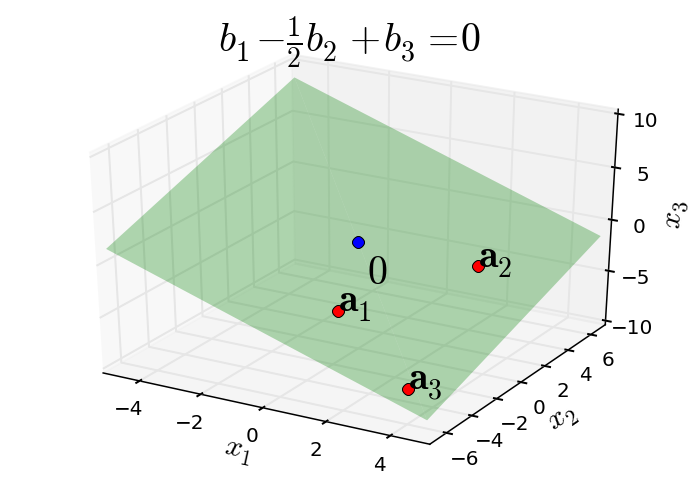

In [4]:
sl.hide_code_in_slideshow()
# %matplotlib qt
ax = ut.plotSetup3d(-5,5,-7,7,-10,10)
a1 = [1.0,-4.0,-3.0]
a2 = [3.0,2.0,-2.0]
a3 = [4.0, -6.0, -7]
ax.text(a1[0],a1[1],a1[2],r'$\bf a_1$',size=20)
ax.text(a2[0],a2[1],a2[2],r'$\bf a_2$',size=20)
ax.text(a3[0],a3[1],a3[2],r'$\bf a_3$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a_1,a_2,a_3$}',size=16)
ax.text(0.2,0.2,-4,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,a1,a2,'Green')
ut.plotPoint3d(ax,a1[0],a1[1],a1[2],'r')
ut.plotPoint3d(ax,a2[0],a2[1],a2[2],'r')
ut.plotPoint3d(ax,a3[0],a3[1],a3[2],'r')
ut.plotPoint3d(ax,0,0,0,'b')
# plotting the axes
#ut.plotIntersection3d(ax,[0,0,1,0],[0,1,0,0])
#ut.plotIntersection3d(ax,[0,0,1,0],[1,0,0,0])
#ut.plotIntersection3d(ax,[0,1,0,0],[1,0,0,0])
ax.set_title(r'$b_1 - \frac{1}{2}b_2 + b_3 = 0$',size=20)
# ax.mouse_init()
print ''

The set of points that makes $b_1 - \frac{1}{2}b_2 + b_3 = 0$ is the set of $\bf b$ values that makes $A{\bf x} = {\bf b}$ consistent.  But if $A{\bf x} = {\bf b}$ then ${\bf b}$ lies within Span$\{\bf a_1, a_2, a_3\}$.  

So we have determined that Span$\{\bf a_1, a_2, a_3\}$ is the same point set as $b_1 - \frac{1}{2}b_2 + b_3 = 0$.

That means that Span$\{\bf a_1, a_2, a_3\}$ is a _plane_ in this case.  In the figure we have plotted $\bf a_1, a_2,$ and $\bf a_3$ and you can see that all three points, as well as the origin, lie in the same plane.

Now, in the most general case, four points will _not_ line in a plane.  In other words, the span of three vectors in $\mathbb{R}^3$ can be the whole space $\mathbb{R}^3$.

## Question Time! Q4.3

Now we will tie together all three views of our question.

__Theorem:__ Let $A$ be an $m \times n$ matrix.  Then the following statements are logically equivalent.  That is, for a particular $A,$ either they are all true or they are all false.

1. For each $\bf b$ in $\mathbb{R}^n,$ the equation $A{\bf x} = {\bf b}$ has a solution.
1. Each $\bf b$ in $\mathbb{R}^n$ is a linear combination of the columns of $A$.
1. The columns of $A$ span $\mathbb{R}^m$.
1. $A$ has a pivot position in every row.

This theorem is very powerful and general.  Notice that we started by thinking about a matrix equation, but we ended by making statements about $A$ alone.  This is the first time we are studying the property of a matrix itself; we will study many properties of matrices on their own as we progress.

## Inner Product

There is a simpler way to compute the matrix-vector product.  It uses a concept called the __inner product__ or __dot product.__

The inner product is defined for two sequences of numbers, and returns a single number.   For example, the expression

$$[3\;5\;1] \left[\begin{array}{c}2\\-1\\4\end{array}\right]$$

is the same as

$$(3\cdot 2) + (5\cdot -1) + (1 \cdot 4)$$

which is the sum of the products of the corresponding entries, and yields the scalar value 5.  This is the inner product of the two sequences.

The general definition of the inner product is:

$$[x_1\;x_2\;\dots\;x_n] \left[\begin{array}{c}y_1\\y_2\\\vdots\\y_n\end{array}\right] = \sum_{i=1}^n x_i y_i$$


Let's see how this can be used to think about matrix-vector multiplication.

Consider the matrix-vector multiplication

$$\left[\begin{array}{rrr}2&3&4\\-1&5&-3\\6&-2&8\end{array}\right]\;\left[\begin{array}{r}x_1\\x_2\\x_3\end{array}\right]$$


$$= x_1\left[\begin{array}{r}2\\-1\\6\end{array}\right] + x_2\left[\begin{array}{r}3\\5\\-2\end{array}\right] + x_3\left[\begin{array}{r}4\\-3\\8\end{array}\right]$$


$$= \left[\begin{array}{r}2x_1\\-1x_1\\6x_1\end{array}\right] + \left[\begin{array}{r}3x_2\\5x_2\\-2x_2\end{array}\right] + \left[\begin{array}{r}4x_3\\-3x_3\\8x_3\end{array}\right]$$


$$= \left[\begin{array}{r}2x_1+3x_2+4x_3\\-1x_1+5x_2-3x_3\\6x_1-2x_2+8x_3\end{array}\right] $$

Now, what is the first entry in the result?  It is the _inner product_ of the first row of $A$ and $\bf x$.  That is, 

$$[2\;3\;4] \left[\begin{array}{c}x_1\\x_2\\x_3\end{array}\right] = [2x_1+3x_2+4x_3]$$

This is a fast and simple way to compute the result of a matrix-vector product.  Each element of the result is the _inner product_ of the corresponding row of $A$ and the vector $\bf x$.

$$ \left[\begin{array}{ccc}2&3&4\\&&\\&&\end{array}\right]\left[\begin{array}{c}x_1\\x_2\\x_3\end{array}\right] = \left[\begin{array}{ccc}2x_1&+3x_2&+4x_3\\&&\\&&\end{array}\right]$$

$$ \left[\begin{array}{ccc}&&\\-1&5&-3\\&&\end{array}\right]\left[\begin{array}{c}x_1\\x_2\\x_3\end{array}\right] = \left[\begin{array}{ccc}&&\\-x_1&+5x_2&-3x_3\\&&\end{array}\right]$$

## Example.

$$\left[\begin{array}{rrr}1&2&-1\\0&-5&3\end{array}\right]\left[\begin{array}{r}4\\3\\7\end{array}\right] = \left[\begin{array}{rrr}1\cdot 4&+2\cdot 3&-1\cdot 7\\0\cdot 4&-5\cdot 3&+3\cdot 7\end{array}\right] = \left[\begin{array}{r}3\\6\end{array}\right].$$

## An (I)nteresting matrix

Consider this matrix equation:

$$\left[\begin{array}{rrr}1&0&0\\0&1&0\\0&0&1\end{array}\right]\;\left[\begin{array}{r}r\\s\\t\end{array}\right] = \left[\begin{array}{rrr}1\cdot r&+0\cdot s&+0\cdot t\\0\cdot r&+1\cdot s&+0\cdot t\\0\cdot r&+0\cdot s&+1\cdot t\end{array}\right] = \left[\begin{array}{r}r\\s\\t\end{array}\right].$$

This sort of matrix -- with 1s on the diagonal and 0s everywhere else -- is called an __identity matrix__ and is denoted by $I$.

You can see that for any $\bf x$, $I\bf x = x.$

## Algebraic Properties of the Matrix-Vector Product

__Theorem.__ If $A$ is an $m \times n$ matrix, $\bf u$ and $\bf v$ are vectors in $\mathbb{R}^n$, and $c$ is a scalar, then:

1. $A({\bf u} + {\bf v}) = A{\bf u} + A{\bf v};$
1. $A(c{\bf u}) = c(A{\bf u}).$

__Proof:__ Let us take $n=3$, $A = [\bf a_1\;a_2\;a_3],$ and $\bf u,v \in \mathbb{R}^3.$  

Then to prove (1.):

$$A({\bf u} + {\bf v}) = [{\bf a_1\;a_2\;a_3}]\left[\begin{array}{r}u_1+v_1\\u_2+v_2\\u_3+v_3\end{array}\right]$$


$$=(u_1+v_1){\bf a_1} + (u_2+v_2){\bf a_2} + (u_3+v_3){\bf a_3}$$


$$=(u_1{\bf a_1} + u_2{\bf a_2} + u_3{\bf a_3}) + (v_1{\bf a_1} + v_2{\bf a_2} + v_3{\bf a_3})$$


$$=A{\bf u} + A{\bf v}.$$

And to prove (2.):

$$A(c{\bf u}) = [{\bf a_1\;a_2\;a_3}]\left[\begin{array}{r}c u_1\\c u_2\\c u_3\end{array}\right]$$

$$ = (c u_1){\bf a_1} + (c u_2){\bf a_2} + (c u_3){\bf a_3}$$

$$= c (u_1{\bf a_1}) + c (u_2{\bf a_2}) + c (u_3{\bf a_3})$$

$$= c (u_1{\bf a_1} + u_2{\bf a_2} + u_3{\bf a_3})$$

$$= c (A{\bf u}).$$